In [0]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.utils import shuffle

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
classes_dict = {
    'thumbs up': 0,
    'yeet': 1,
    'bro fist': 2,
    'wave': 3,
    'yo': 4,
    'peace': 5
}

In [0]:
image_data = []
classes = []

IMG_SIZE = 128

base_dir = './Images/'
for sub_dir in os.listdir(base_dir):
    if(sub_dir == '.DS_Store'):
        continue
    curr_dir = base_dir + sub_dir + '/'
    for image in os.listdir(curr_dir):
        if(image == '.DS_Store'):
            continue
        img = cv2.imread(curr_dir + image, 0)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img =img/255.0
        image_data.append(img)
        classes.append(classes_dict[sub_dir])
        

In [0]:
def showImgs():
    for ix in range(0,len(image_data), 300):
        plt.title(classes[ix])
        plt.imshow(image_data[ix], cmap='gray')
        plt.show()

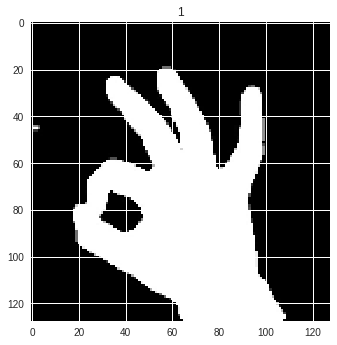

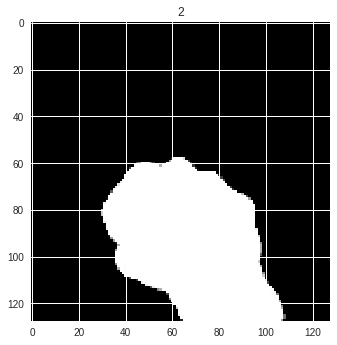

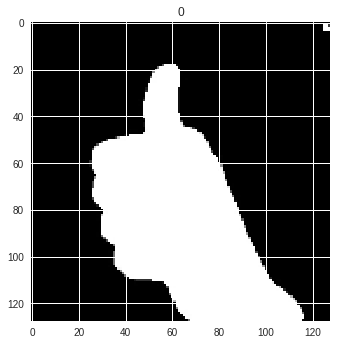

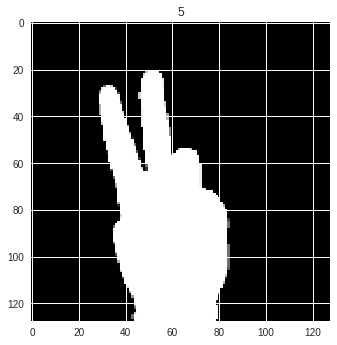

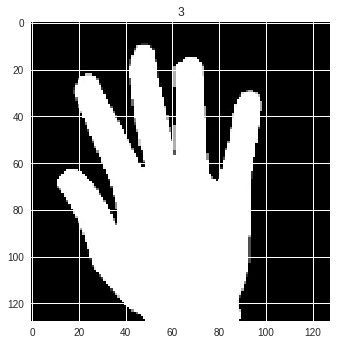

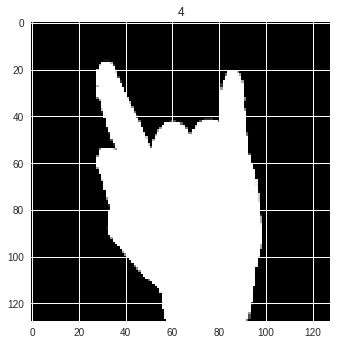

In [0]:
showImgs()


In [0]:
X_ = np.array(image_data)
Y_ = np_utils.to_categorical(classes)

X,Y = shuffle(X_,Y_,random_state = 0)

In [0]:
X.shape, Y.shape

((1800, 128, 128), (1800, 6))

In [0]:
X = X.reshape((-1,IMG_SIZE,IMG_SIZE,1))

In [0]:
X.shape, Y.shape

((1800, 128, 128, 1), (1800, 6))

In [0]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 16)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
__________

In [0]:
model.compile(optimizer=Adam(lr=0.0003), metrics=['accuracy'], loss='categorical_crossentropy')


In [0]:
model.fit(X,Y,epochs=20,batch_size=128, shuffle=True, validation_split = 0.2)

Train on 1440 samples, validate on 360 samples
Epoch 1/20
1440/1440 [==============================] - 6s 4ms/step - loss: 1.5314 - acc: 0.4889 - val_loss: 1.0015 - val_acc: 0.9333
Epoch 2/20
1440/1440 [==============================] - 2s 1ms/step - loss: 0.3358 - acc: 0.9201 - val_loss: 0.1190 - val_acc: 0.9611
Epoch 3/20
1440/1440 [==============================] - 2s 1ms/step - loss: 0.1274 - acc: 0.9556 - val_loss: 0.0757 - val_acc: 0.9833
Epoch 4/20
1440/1440 [==============================] - 2s 1ms/step - loss: 0.0762 - acc: 0.9806 - val_loss: 0.0555 - val_acc: 0.9778
Epoch 5/20
1440/1440 [==============================] - 2s 1ms/step - loss: 0.0735 - acc: 0.9785 - val_loss: 0.0759 - val_acc: 0.9750
Epoch 6/20
1440/1440 [==============================] - 2s 1ms/step - loss: 0.0411 - acc: 0.9847 - val_loss: 0.0567 - val_acc: 0.9806
Epoch 7/20
1440/1440 [==============================] - 2s 1ms/step - loss: 0.0249 - acc: 0.9910 - val_loss: 0.0404 - val_acc: 0.9944
Epoch 8/20
1440

In [0]:
X_ = X_.reshape((-1,IMG_SIZE,IMG_SIZE,1))
y_preds = model.predict_classes(X_)

In [0]:
classes = np.array(classes)

In [0]:
acc = np.mean(classes == y_preds)

In [0]:
for ix in range(y_preds.shape[0]):
  if(y_preds[ix]!=classes[ix]):
    print(ix)
    print(y_preds[ix], classes[ix])

1531
0 4


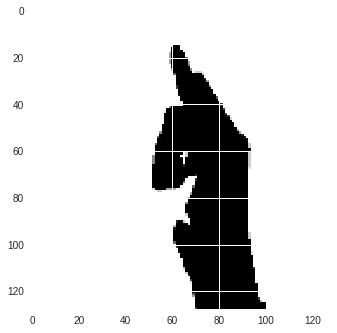

In [0]:
plt.imshow(image_data[1531])
plt.show()

In [0]:
model.save('./gesture-model.h5')